In [206]:
import pandas as pd
import numpy as np

In [207]:
my_array = np.array([[[[1, 2, 3],[4,5,6],[7,8,9]],[[1, 2, 3],[4,5,6],[7,8,9]]],[[[1, 2, 3],[4,5,6],[7,8,9]],[[1, 2, 3],[4,5,6],[7,8,9]]]])
row_names = ['a', 'b']
col_names = ['c','d']
my_array = np.array([[1,2],[3,4]])
my_array
df = pd.DataFrame(my_array,index = row_names, columns = col_names)
df

,c,d
a,1,2
b,3,4


# Lesson 3: Load Data From CSV

In [217]:
# Lesson 3 
import csv
# Load CSV using Pandas from URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
print(data.shape)

(768, 9)


In [209]:
# Write CSV
with open('eggs.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Spam'] * 5 + ['Baked Beans'])
    spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])

In [210]:
#Read CSV
with open('eggs.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(row)
        #print ', '.join(row)


['Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Baked Beans']
[]
['Spam', 'Lovely Spam', 'Wonderful Spam']
[]


# Lesson 4: Understand Data with Descriptive Statistics

In [211]:
data.head()
data.describe()
data.shape
data.dtypes
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Lesson 5: Understand Data with Visualization

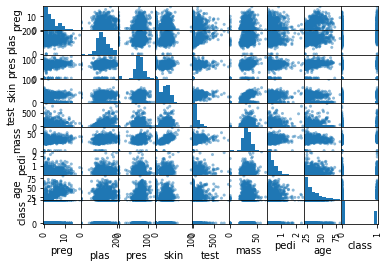

In [212]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

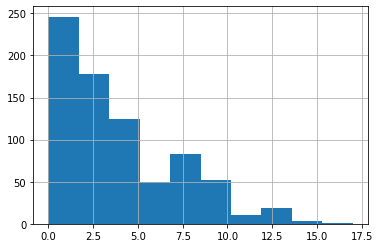

In [213]:
data['preg'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B88A525C0>,
      dtype=object)

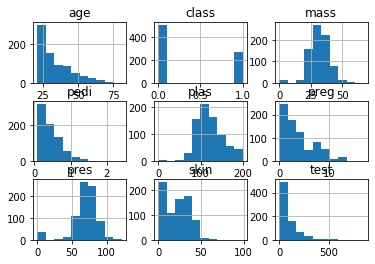

In [214]:
data.hist()

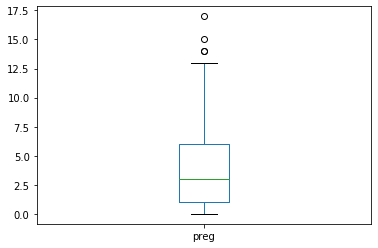

In [215]:
data['preg'].plot(kind='box')

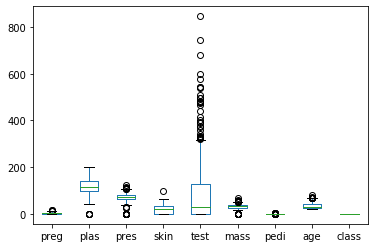

In [216]:
data.plot(kind='box')

# Lesson 6: Prepare For Modeling by Pre-Processing Data

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
array = data.values

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

# Standardize data (mean=0, std=1)
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [91]:
# Normalize data (range between 0 and 1)
X_normalized = preprocessing.normalize(X, norm='l2')
print(X_normalized[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


# Lesson 7: Algorithm Evaluation With Resampling Methods

In [97]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)"%(results.mean()*100.0, results.std()*100.0))

Accuracy: 76.951% (4.841%)


# Lesson 8: Algorithm Evaluation Metrics

In [112]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)"%(results.mean(), results.std()))

Logloss: -0.493 (0.047)


In [114]:
# Accuracy
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
results
print("accuracy: %.3f (%.3f)"%(results.mean(), results.std()))


accuracy: 0.770 (0.048)


array([0.701, 0.818, 0.74 , 0.714, 0.779, 0.753, 0.857, 0.805, 0.724,
       0.803])

In [122]:
# Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, X, Y, cv=kfold)
conf_mat = confusion_matrix(Y, y_pred)
print(conf_mat, "confusion matrix")

[[446  54]
 [123 145]] confusion matrix


In [123]:
# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.89      0.83       500
     class 1       0.73      0.54      0.62       268

   micro avg       0.77      0.77      0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



# Lesson 9: Spot-Check Algorithms 

In [201]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [133]:
# KNN Regression
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


In [131]:
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, Y)
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.70525594452485


In [142]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
y=Y.astype('int')
model = LinearDiscriminantAnalysis()
model = model.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-42.69941176470588


In [164]:
# Logistic regression
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(dual = False, random_state=42).fit(X, y)
#results = cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
#print(results.mean())

In [155]:
# SVM
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, y)
results = cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-95.12439215686274


In [156]:
# CART - Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 42)
results = cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-37.49949019607843


In [158]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X, y)
results = cross_val_score(clf, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-76.88917647058824


C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Lesson 10: Model Comparison and Selection

In [46]:
# Compare Algorithms
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [173]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category =FutureWarning)

In [174]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('CART',DecisionTreeClassifier(random_state = 42)))
models.append(('RandomForest',RandomForestClassifier(max_depth=2, random_state=42)))
Y = Y.astype('int')

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
SVM: 0.651025 (0.072141)
CART: 0.691319 (0.059464)
RandomForest: 0.756442 (0.063380)


# Lesson 11: Improve Accuracy with Algoritm Tuning

In [1]:
from pandas import read_csv
import numpy
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [49]:
# Grid Search for Algorithm Tuning
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
#model = LogisticRegression()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.2796175593129722
1.0


In [ ]:
# Grid Search for other models: DOESN't SEEM TO WORK
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, Y)
print(clf.best_score_)
print(clf.best_estimator_)

In [51]:
# Randomized search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0,0.14,0.35,0.3435,0.543,1.23,1.245, 1.32])
param_grid = dict(alpha=alphas)

grid = RandomizedSearchCV(model, param_grid, random_state=0)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
#distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
#clf = RandomizedSearchCV(estimator = model, distributions, random_state=0)
#search = clf.fit(iris.data, iris.target)
#search.best_params_{'C': 2..., 'penalty': 'l1'}

0.27962211398439923
1.245


C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [56]:
# Randomized search for other models
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X, Y)
search.best_params_

C:\Users\kia08\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 2.195254015709299, 'penalty': 'l1'}

# Lesson 12: Improve Accuracy with Ensemble Predictions

In [2]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Random Forest Classification
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770745044429255


In [6]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
kfold = KFold(n_splits = 10, random_state = 42)
model = GradientBoostingClassifier(n_estimators = 100)
results = cross_val_score(model,X,Y,cv = kfold)
print(results.mean())

0.7643028024606973


In [7]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
kfold = KFold(n_splits = 10, random_state = 42)
model = AdaBoostClassifier(n_estimators = 50)
results = cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.7539473684210527


In [12]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category =FutureWarning)

In [17]:
# Voting esemble classifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = AdaBoostClassifier(n_estimators=100)
model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('ADA', clf3)], voting='soft')


kfold = KFold(n_splits = 10, random_state = 42)
results = cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.772095010252905


# Lesson 13: Finalize And Save Your Model

In [18]:

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle


In [20]:
# Save Model Using Pickle
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 33%
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)

print(result)

0.7559055118110236


In [21]:
loaded_model.predict(X_test)

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1.

# Lesson 14: Hello World End-to-End Project

Importing data

In [191]:
import pandas as pd
import numpy as np

file = 'iris.data'
names = ['Sepal length', 'Sepal width','Petal length', 'Petal width', 'Species']
data = pd.read_csv(file, header=None, names = names)

One hot encoding

Integer encoding of classes

In [192]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

Understanding data

In [193]:
data.head()
# data.describe()
# data.shape
# data.dtypes
# data.corr()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Visualization of data

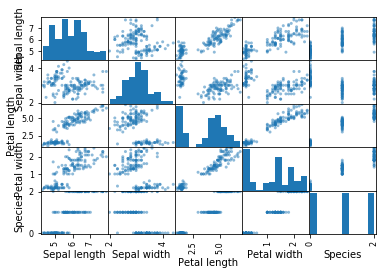

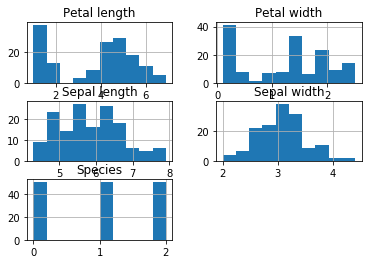

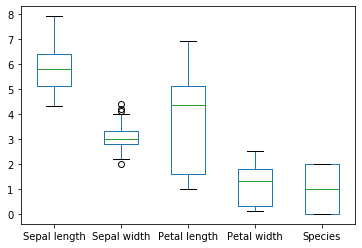

In [194]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()
data.hist()
data.plot(kind='box')

Preprocessing

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X = data.to_numpy()[:,:4]
y = data.to_numpy()[:,4]


# Standardize data (mean=0, std=1)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# summarize transformed data
# np.set_printoptions(precision=3)
# print(rescaledX[0:100,:])
# print(X.mean(axis=0))

Splitting up in training and test set

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Spot check algorithms

In [200]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN',KNeighborsRegressor()))
models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('SVM',SVC(gamma='auto')))
# models.append(('CART',DecisionTreeClassifier(random_state = 42)))
models.append(('RandomForest',RandomForestClassifier(max_depth=2, random_state=42)))

# Y = Y.astype('int')

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)




LR: -0.120000 (0.124900)
KNN: -0.048800 (0.036345)
LDA: -0.030000 (0.045826)
RandomForest: -0.060000 (0.101980)


Save model

In [218]:
model = RandomForestClassifier(max_depth=2, random_state=42)
filename = 'iris_model.sav'
pickle.dump(model, open(filename, 'wb'))